#### Consensus Monte Carlo (CMC) and semiparametric density of products (SDP).

Incorrect in this notebook because likelihoods have been raised to a power instead of prior being raised.

In [1]:
from __future__ import division
get_ipython().magic('matplotlib inline')
import numpy as np, matplotlib.pyplot as plt, math, numpy.random as npr, pystan as ps
from pylab import plot, show, legend
from time import time
from tqdm import trange
import rpy2.robjects as robjects
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()

In [2]:
r = robjects.r
r['source']('consensusMCcov.R')
r['source']('semiparamDPE.R')

value,[RTYPES.CLOSXP]
visible,[RTYPES.LGLSXP]


In [23]:
beta = np.load('/xtmp/DC-BATS_data/ar(2)_errors/beta.npy')
beta_vals_1 = np.transpose(np.load('/xtmp/DC-BATS_data/ar(2)_errors/beta_vals_1.npy'))
beta_vals_2 = np.transpose(np.load('/xtmp/DC-BATS_data/ar(2)_errors/beta_vals_2.npy'))
beta_vals = np.load('/xtmp/DC-BATS_data/ar(2)_errors/beta_full.npy')
p = np.shape(beta_vals_1)[0]

In [4]:
res_1 = r['consensusMCcov'](beta_vals_1)
res_2 = r['consensusMCcov'](beta_vals_2)

In [5]:
cmc_ci_1 = np.percentile(res_1,[2.5,97.5],axis=1)
cmc_ci_2 = np.percentile(res_2,[2.5,97.5],axis=1)

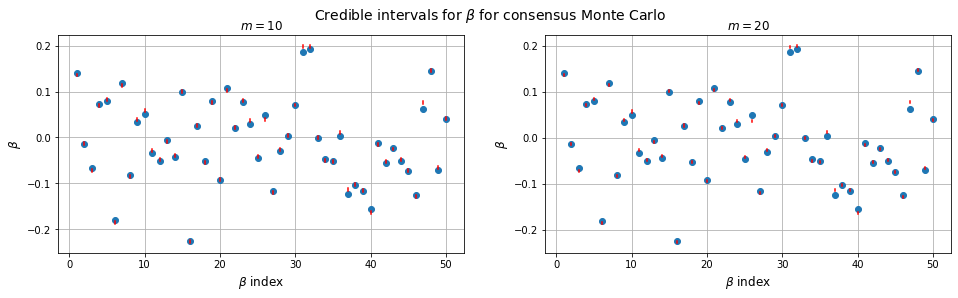

In [6]:
fig = plt.figure(figsize=(16,4))
plt.subplot(121)
plt.plot(np.arange(1,p+1), beta, "o")
for i in range(p) :
    plt.plot([i+1,i+1], cmc_ci_1[:,i], "r-")
plt.grid(True)
plt.xlabel(r"$\beta$ index", fontsize=12)
plt.ylabel(r"$\beta$", fontsize=12)
plt.title(r"$m=10$")
plt.subplot(122)
plt.plot(np.arange(1,p+1), beta, "o")
for i in range(p) :
    plt.plot([i+1,i+1], cmc_ci_2[:,i], "r-")
plt.grid(True)
plt.title(r"$m=20$")
plt.xlabel(r"$\beta$ index", fontsize=12)
plt.ylabel(r"$\beta$", fontsize=12)
plt.suptitle(r"Credible intervals for $\beta$ for consensus Monte Carlo", fontsize=14);

In [7]:
print(np.mean(np.abs(cmc_ci_1[1]-cmc_ci_1[0])))
print(np.mean(np.abs(cmc_ci_2[1]-cmc_ci_2[0])))

0.006372139104880253
0.004507472571727853


In [8]:
res_1 = r['semiparamDPE'](beta_vals_1)
res_2 = r['semiparamDPE'](beta_vals_2)

sdp_ci_1 = np.percentile(res_1,[2.5,97.5],axis=1)
sdp_ci_2 = np.percentile(res_2,[2.5,97.5],axis=1)

In [10]:
print(np.mean(np.abs(sdp_ci_1[1]-sdp_ci_1[0])))
print(np.mean(np.abs(sdp_ci_2[1]-sdp_ci_2[0])))

0.006422196822533504
0.004516341168762026


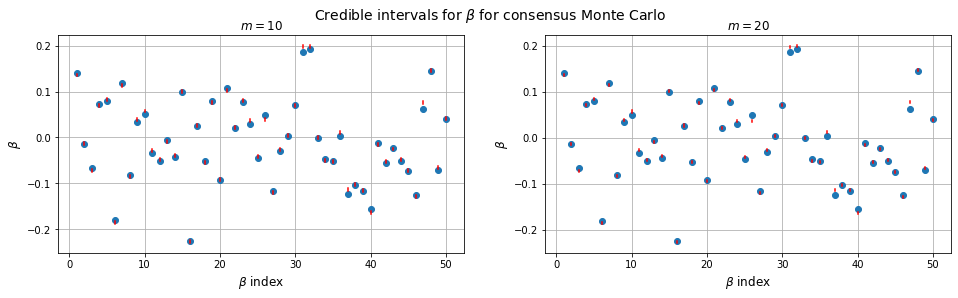

In [11]:
fig = plt.figure(figsize=(16,4))
plt.subplot(121)
plt.plot(np.arange(1,p+1), beta, "o")
for i in range(p) :
    plt.plot([i+1,i+1], sdp_ci_1[:,i], "r-")
plt.grid(True)
plt.xlabel(r"$\beta$ index", fontsize=12)
plt.ylabel(r"$\beta$", fontsize=12)
plt.title(r"$m=10$")
plt.subplot(122)
plt.plot(np.arange(1,p+1), beta, "o")
for i in range(p) :
    plt.plot([i+1,i+1], sdp_ci_2[:,i], "r-")
plt.grid(True)
plt.title(r"$m=20$")
plt.xlabel(r"$\beta$ index", fontsize=12)
plt.ylabel(r"$\beta$", fontsize=12)
plt.suptitle(r"Credible intervals for $\beta$ for consensus Monte Carlo", fontsize=14);

In [12]:
np.shape(beta_vals_1)

(50, 5000, 10)

In [13]:
beta_vals_1[0,:,0]

array([0.1422343 , 0.12571957, 0.13497209, ..., 0.1320742 , 0.14665633,
       0.13071202])

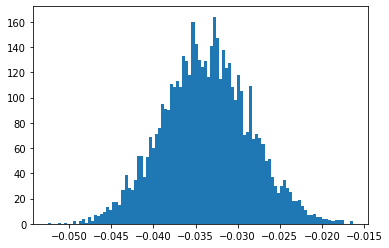

In [15]:
j = 1
i = 1
plt.hist(beta_vals_1[j,:,i], bins=100)
plt.show()

In [36]:
K_1 = np.shape(beta_vals_1)[-1]
gauss_test_1 = np.zeros((p,K_1)).astype(int)
K_2 = np.shape(beta_vals_2)[-1]
gauss_test_2 = np.zeros((p,K_2)).astype(int)
from scipy.stats import shapiro
for j in range(p) :
    for i in range(K_1) :
        gauss_test_1[j,i] = shapiro(beta_vals_1[j,:,i])[1]>0.05
    for i in range(K_2) :
        gauss_test_2[j,i] = shapiro(beta_vals_2[j,:,i])[1]>0.05

In [37]:
np.sum(gauss_test_1), np.sum(gauss_test_2)

(466, 943)